# Week 2: Predicting House Prices

## Constants

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import statsmodels.formula.api as smf

from sklearn import cross_validation as cv
from sklearn import linear_model 


%matplotlib inline

C:\Users\DrjNupurVihan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Current Working Dir

In [2]:
os.getcwd()

'C:\\Users\\DrjNupurVihan\\Documents\\GitHub\\MachineLearning_UoW\\Course1'

##  Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
home_data = pd.read_csv("data/home_data.csv")

In [4]:
print ("Number of ROWS X COLUMNS")
print(home_data.shape)
print("\n")
home_data.head(3)

Number of ROWS X COLUMNS
(21613, 21)




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
home_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exploring the data for housing sales 

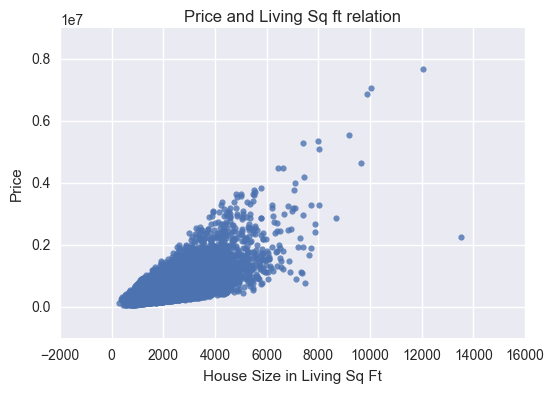

In [6]:
sns.regplot('sqft_living', 'price', 
            data=home_data,
            fit_reg=False) # to stope a linear regressed line to be plotted by default

plt.title('Price and Living Sq ft relation')
plt.xlabel('House Size in Living Sq Ft')
plt.ylabel('Price')

## Create a simple regression model of 1 feature

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

where:

$y$ is the response  
$x$ is the feature  
$\beta_0$ is the intercept  
$\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the model coefficients.


For this initial simplistic regression model we are going to use:

**`sqft_living`** as the independent variable or $x$  
**`price`** as the dependent variable or $y$

#### Creating Training and Test data sets and X, y

In [7]:
random.seed(0)
train, test = cv.train_test_split(home_data, train_size = 0.80)

In [8]:
print(train.shape)
print(test.shape)

(17290, 21)
(4323, 21)


In [9]:
X = train[['sqft_living']]
y = train.price

#### Model Approach 1: Using Scikit-Learn

Creating a model in `sklearn` is relativey simple. Create a object that calls the function and use the object to fit **`X`** & **`y`**

In [10]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict too.

In [11]:
print (model.intercept_)
print (model.coef_)
model.score(X,y)    # calculate R-Squared

-48038.0935789
[ 282.58363506]


0.49136284763612731

**_RMSE in sklearn_**

In [12]:
scores = cv.cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

In [13]:
MSE = scores.mean()# calculate RMSE
RMSE = math.sqrt(-1*MSE)
RMSE

264485.83787116286

##### Let's show what our predictions look like

In [14]:
model.predict(test[['sqft_living']])

array([  613207.61246158,   432354.08602315,   904268.75657343, ...,
         898617.08387223,  1446829.33588872,   500174.15843757])

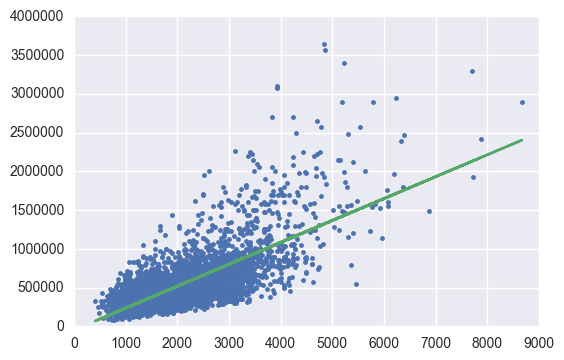

In [15]:
plt.plot(test['sqft_living'],test['price'],'.',
        test['sqft_living'],model.predict(test[['sqft_living']]),'-')

Blue dots are original data, green line is the prediction from the simple regression.

#### Model Approach 2: Using Statsmodels

In [16]:
lm = smf.ols(formula='price ~ sqft_living', data=train).fit()
print(lm.conf_int())

                        0             1
Intercept   -57776.122140 -38300.065017
sqft_living    278.297597    286.869673


In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.670e+04
Date:                Sun, 30 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:35:56   Log-Likelihood:            -2.4041e+05
No. Observations:               17290   AIC:                         4.808e+05
Df Residuals:                   17288   BIC:                         4.808e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -4.804e+04   4968.125     -9.669      0.000     -5.78e+04 -3.83e+04
sqft_living   282.5836      2.187    129.232      0.000       278.298   286.870
==============================================================================
Omnibus:                    12394.369   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           520791.123
Skew:                           2.970   Prob(JB):                         0.00
Kurtosis:                      29.223   Cond. No.                     5.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
lm.predict(test[['sqft_living']])

array([  613207.61246158,   432354.08602315,   904268.75657343, ...,
         898617.08387223,  1446829.33588872,   500174.15843757])

**_RMSE in statsmodels_**

In [19]:
math.sqrt(lm.mse_resid)

264454.9694231884

In [ ]:
plt.plot(test['sqft_living'],test['price'],'.',
        test['sqft_living'],lm.predict(test[['sqft_living']]),'-')

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [ ]:
multi_featured = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

### Build a regression model with more features

### Comparing the results of the simple model with adding more features

The RMSE goes down from \$TBD to \$TBD using more features.

### Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [22]:
house1 = home_data[home_data.id=='5309101200']

C:\Users\DrjNupurVihan\Anaconda3\lib\site-packages\pandas\core\ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [ ]:
print house1['price']

In [ ]:
print model.predict(house1)

In [ ]:
print my_features_model.predict(house1)

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [ ]:
house2 = sales[sales['id']=='1925069082']

In [ ]:
print sqft_model.predict(house2)

In [ ]:
print my_features_model.predict(house2)

In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [ ]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)